In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/My Drive/datasets/significant earthquakes.csv', sep=",")

In [ ]:
# размер набора данных
data.shape

(23412, 21)

In [ ]:
# типы колонок
data.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

In [ ]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [ ]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Обработка пропусков данных

## Удаление

In [ ]:
# Удаление колонок, содержащих пустые значения
data_clear_columns = data.dropna(axis=1, how='any')
print("Было колонок:", data.shape[1])
print("Осталось колонок:", data_clear_columns.shape[1])

Было колонок: 21
Осталось колонок: 12


In [ ]:
# Удаление строк, содержащих пустые значения
data_clean_rows = data.dropna(axis=0, how='any')
print("Было строк:", data.shape[0])
print("Осталось строк:", data_clean_rows.shape[0])

Было строк: 23412
Осталось строк: 14


## Заполнение 0

In [ ]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [ ]:
# Заполнение всех пропущенных значений нулями
data_filled_with_zeros = data.fillna(0)
data_filled_with_zeros.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,0.0,0.0,6.0,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,0.0,0.0,6.2,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,0.0,0.0,5.8,MW,...,0.0,0.0,0.0,0.0,0.0,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


## Внедрение значений

### Числовые значения

In [ ]:
import pandas as pd

num_cols = []
total_count = data.shape[0]
missing_data = []

for col in data.columns:
    temp_null_count = data[col].isnull().sum()
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt == 'float64' or dt == 'int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        missing_data.append([col, dt, temp_null_count, temp_perc])

missing_df = pd.DataFrame(missing_data, columns=['Название', 'Тип', 'Количество пропусков', 'Процент пропусков'])

missing_df


,Название,Тип,Количество пропусков,Процент пропусков
0,Depth Error,float64,18951,80.95
1,Depth Seismic Stations,float64,16315,69.69
2,Magnitude Error,float64,23085,98.60
3,Magnitude Seismic Stations,float64,20848,89.05
4,Azimuthal Gap,float64,16113,68.82
5,Horizontal Distance,float64,21808,93.15
6,Horizontal Error,float64,22256,95.06
7,Root Mean Square,float64,6060,25.88


In [ ]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Depth Error,Depth Seismic Stations,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
23407,1.2,40.0,0.320,18.0,42.47,0.120,NaN,0.1898
23408,2.0,33.0,0.260,18.0,48.58,0.129,NaN,0.2187
23409,1.8,NaN,NaN,NaN,91.00,0.992,4.8,1.5200
23410,1.8,NaN,NaN,NaN,26.00,3.553,6.0,1.4300


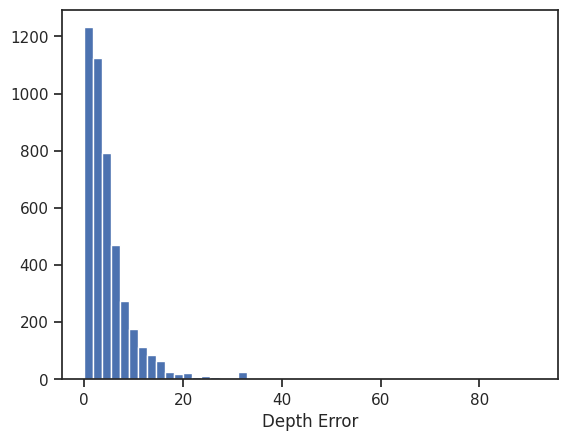

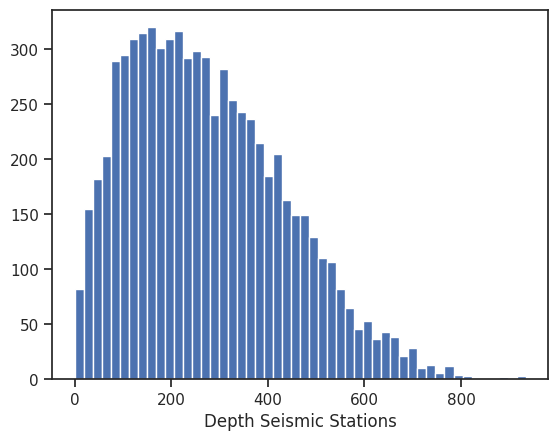

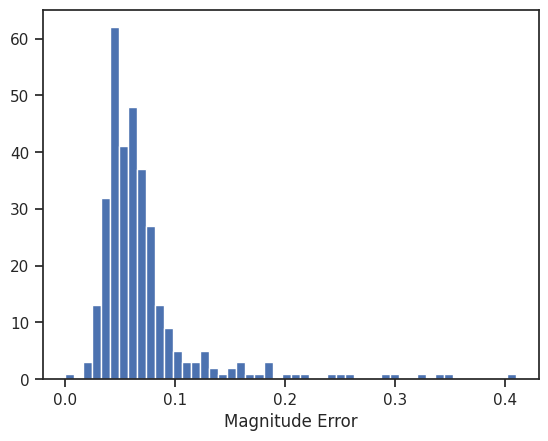

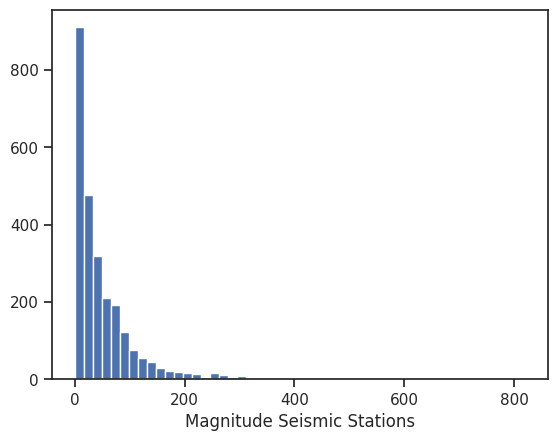

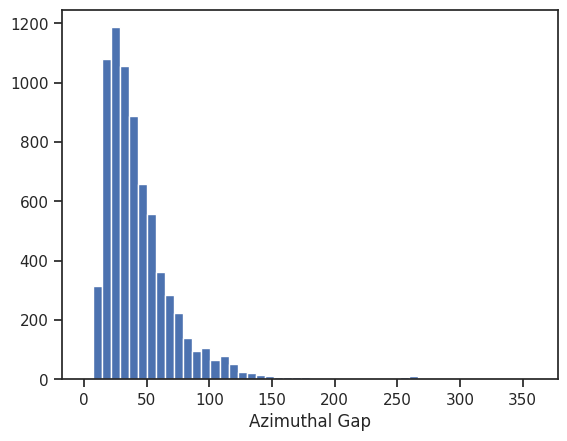

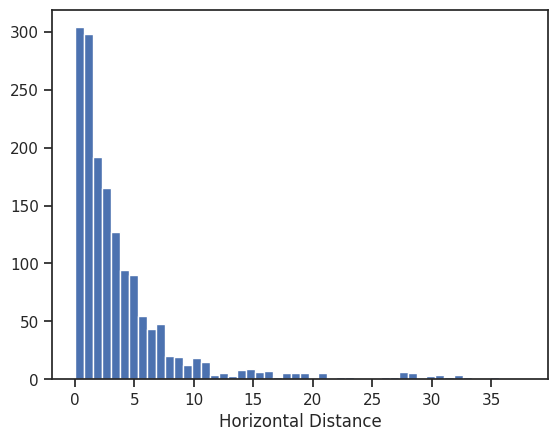

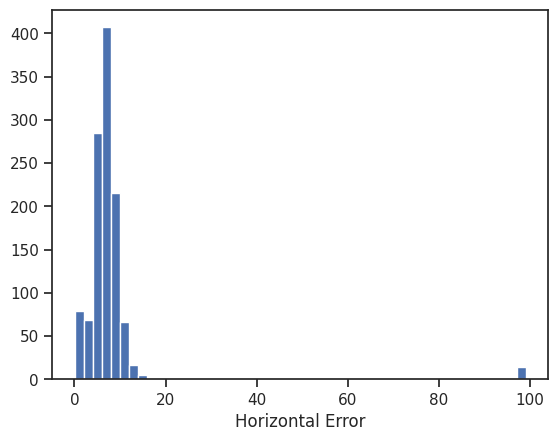

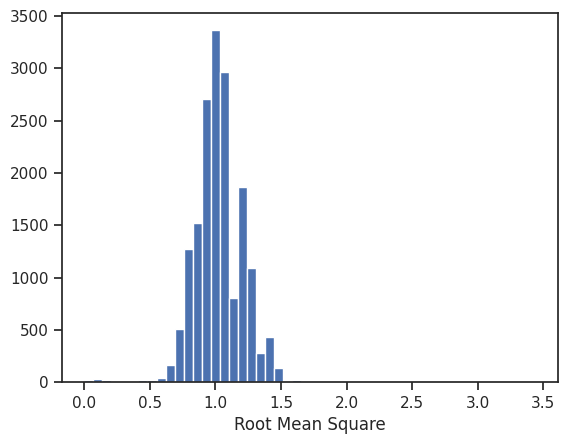

In [ ]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [ ]:
data_num_DSS = data_num[['Depth Seismic Stations']]
data_num_DSS.head()

,Depth Seismic Stations
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [ ]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_DSS)
mask_missing_values_only

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
strategies=['mean', 'median', 'most_frequent']

In [ ]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_DSS)
    return data_num_imp[mask_missing_values_only]

In [ ]:
for strategy in strategies:
  print(strategy, test_num_impute(strategy))

mean [275.36409751 275.36409751 275.36409751 ... 275.36409751 275.36409751
 275.36409751]
median [255. 255. 255. ... 255. 255. 255.]
most_frequent [0. 0. 0. ... 0. 0. 0.]


In [ ]:
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]

    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)

    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)

    filled_data = data_num_imp[mask_missing_values_only]

    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [ ]:
data[['Magnitude Seismic Stations']].describe()

,Magnitude Seismic Stations
count,2564.000000
mean,48.944618
std,62.943106
min,0.000000
25%,10.000000
50%,28.000000
75%,66.000000
max,821.000000


In [ ]:
for strategy in strategies:
  print(test_num_impute_col(data, 'Magnitude Seismic Stations', strategy))

('Magnitude Seismic Stations', 'mean', 20848, 48.94461778471139, 48.94461778471139)
('Magnitude Seismic Stations', 'median', 20848, 28.0, 28.0)
('Magnitude Seismic Stations', 'most_frequent', 20848, 1.0, 1.0)


### Категориальные значения

In [ ]:
import pandas as pd

num_cols = []
total_count = data.shape[0]
missing_data = []

for col in data.columns:
    temp_null_count = data[col].isnull().sum()
    dt = str(data[col].dtype)
    if temp_null_count > 0 and (dt == 'object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        missing_data.append([col, dt, temp_null_count, temp_perc])

missing_df = pd.DataFrame(missing_data, columns=['Название', 'Тип', 'Количество пропусков', 'Процент пропусков'])

missing_df


,Название,Тип,Количество пропусков,Процент пропусков
0,Magnitude Type,object,3,0.01


In [ ]:
cat_temp_data = data[['Magnitude Type']]
cat_temp_data.head()

,Magnitude Type
0,MW
1,MW
2,MW
3,MW
4,MW


In [ ]:
cat_temp_data['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', nan, 'MWB', 'MWW',
       'MWR'], dtype=object)

In [ ]:
cat_temp_data[cat_temp_data['Magnitude Type'].isnull()].shape

(3, 1)

In [ ]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
np.unique(data_imp2)

array(['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR', 'MWW'],
      dtype=object)

In [ ]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
np.unique(data_imp3)

array(['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR', 'MWW',
       'NA'], dtype=object)

In [ ]:
data_imp3[data_imp3=='NA'].size

3

# Преобразование категориальный признаков в числовые

In [ ]:
data.select_dtypes(include='object')

,Date,Time,Type,Magnitude Type,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,Earthquake,MW,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,Earthquake,MW,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,Earthquake,MW,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,Earthquake,MW,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,Earthquake,MW,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,Earthquake,ML,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,Earthquake,ML,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,Earthquake,MWW,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,Earthquake,MWW,US10007NL0,US,US,US,Reviewed


## LabelEcoder

In [ ]:
cat_enc = pd.DataFrame({'Magnitude Type':data_imp2.T[0]})
cat_enc

,Magnitude Type
0,MW
1,MW
2,MW
3,MW
4,MW
...,...
23407,ML
23408,ML
23409,MWW
23410,MWW


In [ ]:
cat_enc['Magnitude Type'].unique()

array(['MW', 'ML', 'MH', 'MS', 'MB', 'MWC', 'MD', 'MWB', 'MWW', 'MWR'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['Magnitude Type'])

In [ ]:
cat_enc_le

array([5, 5, 5, ..., 9, 9, 0])

In [ ]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Обратная кодировка
le.inverse_transform([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array(['MB', 'MD', 'MH', 'ML', 'MS', 'MW', 'MWB', 'MWC', 'MWR', 'MWW'],
      dtype=object)

## OrdinalEcoder

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data_oe = data[['Type', 'Status']]
data_oe.head()

,Type,Status
0,Earthquake,Automatic
1,Earthquake,Automatic
2,Earthquake,Automatic
3,Earthquake,Automatic
4,Earthquake,Automatic


In [ ]:
# Импьютация константой
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Earthquake', 'Automatic'],
       ['Earthquake', 'Automatic'],
       ['Earthquake', 'Automatic'],
       ...,
       ['Earthquake', 'Reviewed'],
       ['Earthquake', 'Reviewed'],
       ['Earthquake', 'Reviewed']], dtype=object)

In [ ]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [ ]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3.])

In [ ]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([0., 1.])

In [ ]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['Earthquake', 'Explosion', 'Nuclear Explosion', 'Rock Burst'],
       dtype=object),
 array(['Automatic', 'Reviewed'], dtype=object)]

In [ ]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Earthquake', 'Automatic'],
       ['Earthquake', 'Automatic'],
       ['Earthquake', 'Automatic'],
       ...,
       ['Earthquake', 'Reviewed'],
       ['Earthquake', 'Reviewed'],
       ['Earthquake', 'Reviewed']], dtype=object)

## Кодирование шкал порядка

In [ ]:
# В датасете нет подходящих данных

## One-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(data[['Type']])

In [ ]:
data[['Type']].shape

(23412, 1)

In [ ]:
cat_enc_ohe.shape

(23412, 4)

In [ ]:
cat_enc_ohe

<23412x4 sparse matrix of type '<class 'numpy.float64'>'
	with 23412 stored elements in Compressed Sparse Row format>

In [ ]:
cat_enc_ohe.todense()[0:10]

matrix([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.]])

## Pandas get_dummies

In [ ]:
pd.get_dummies(data[["Type"]]).head()

,Type_Earthquake,Type_Explosion,Type_Nuclear Explosion,Type_Rock Burst
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


# Масштабирование данных

## MinMax масштабирование

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Depth']])

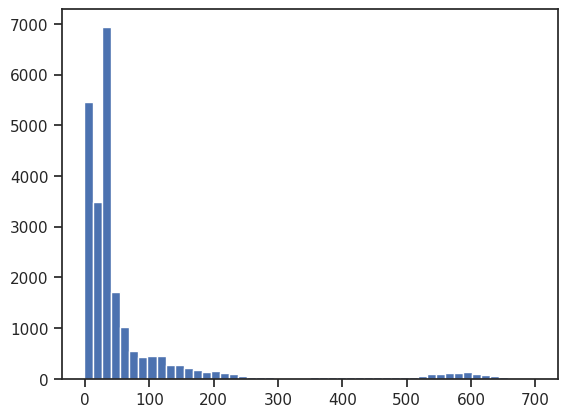

In [ ]:
plt.hist(data['Depth'], 50)
plt.show()

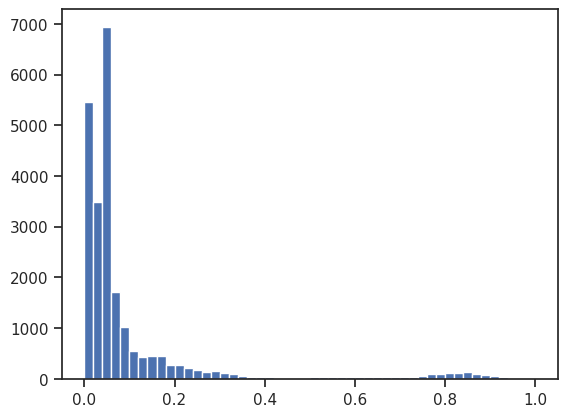

In [ ]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование на основе Z-оценки

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Depth']])

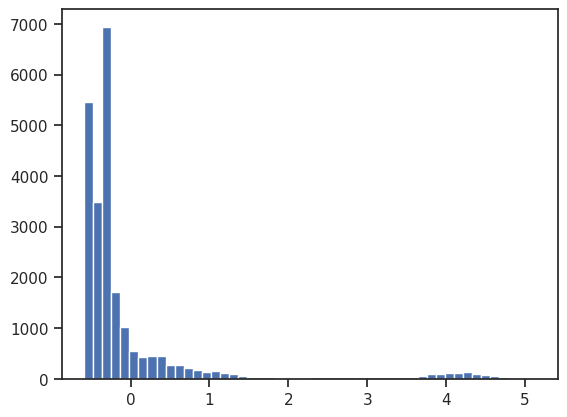

In [ ]:
plt.hist(sc2_data, 50)
plt.show()